## Mic Check / Introduction
We are about to perform a sentiment analysis using TextBlob to process our data. What is TextBlob?
- [TextBlob](https://textblob.readthedocs.io/en/dev/) is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more. [[docs]](https://textblob.readthedocs.io/en/dev/)

So, our goal is to label every word in a corpus in terms of polarity and subjectivity. A corpus' sentiment is the average of these.
- Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
- Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

In [15]:
import pandas
from textblob import TextBlob
import matplotlib.pyplot as plt

data = pandas.read_pickle('corpus.pkl')

Let's first take a look at the state of our data.

In [16]:
data

,lyrics,name
biggie,the ten crack commandments what nigga...,The Notorious B.I.G.
eminem,look i was gonna go easy on you not to hurt yo...,Eminem
fifty,man we gotta go get somethin to eat man im hun...,50 Cent
game,im a bldoubleod been on songs with sndoubleop ...,The Game
nas,but thats the whole tragic point my friends wh...,Nas
snoop,ugh hahaha im serious nigga one of yall niggas...,Snoop Doggy Dogg
tupac,how many brothers fell victim to the streets r...,Tupac Amaru


Next stop: we will create lambda functions to calculate the polarity and subjectivity of each rapper.

In [17]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['lyrics'].apply(pol)
data['subjectivity'] = data['lyrics'].apply(sub)
data

,lyrics,name,polarity,subjectivity
biggie,the ten crack commandments what nigga...,The Notorious B.I.G.,0.023304,0.503563
eminem,look i was gonna go easy on you not to hurt yo...,Eminem,-0.064630,0.533969
fifty,man we gotta go get somethin to eat man im hun...,50 Cent,0.037174,0.551940
game,im a bldoubleod been on songs with sndoubleop ...,The Game,0.003092,0.436697
nas,but thats the whole tragic point my friends wh...,Nas,-0.010095,0.453374
snoop,ugh hahaha im serious nigga one of yall niggas...,Snoop Doggy Dogg,-0.020491,0.481471
tupac,how many brothers fell victim to the streets r...,Tupac Amaru,0.058860,0.442701


Well that's something. We now know that Tupac is the most positive and he the least subjective in his lyrics, while 50 Cent is most subjective.

But, how does TextBlob know what words mean? Well, lingvists have given different labels to all the words in the English vocabulary and TextBlob is a library that wraps that knowledge. Let's see an example:

In [18]:
TextBlob('good').sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [19]:
TextBlob('very good').sentiment

Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)

In [20]:
TextBlob('excellent').sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

The output says that the word 'nice' transmits 60% of the positivity a word can transmit, while it's 100% of subjective nature. 

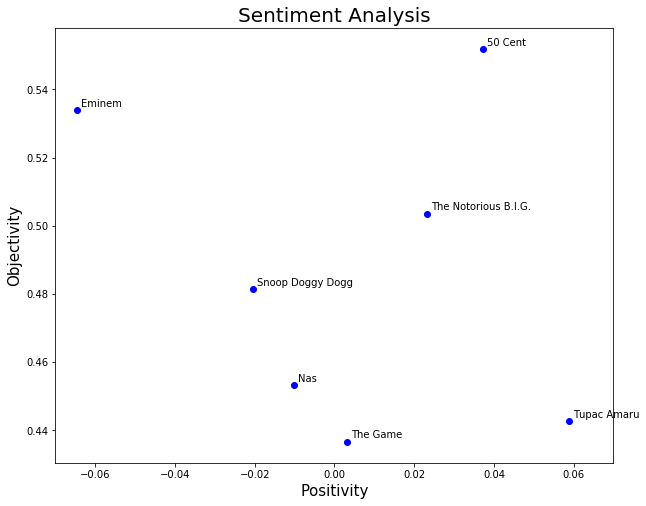

In [22]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, rapper in enumerate(data.index):
    x = data.polarity.loc[rapper]
    y = data.subjectivity.loc[rapper]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['name'][index], fontsize=10)
    plt.xlim(-.07, .07) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('Positivity', fontsize=15)
plt.ylabel('Objectivity', fontsize=15)

plt.show()

Conclusions from the sentiment analysis:
- Tupac is the most 'positive' in his words, while Eminem is by far the most 'negative' lyricist 
- The Game, Nas and Tupac are mostly subjective and talk about their feelings, while Eminem and 50 Cent state more facts.